#Video Game Sales
In this notebook we want to investigate the popularity of games, across publishers, platforms and years. We want to see if there is any connection to which platform the games has been published and how well they perform sales-wise. We also want to try to predict what platform a given game has been released to, when provided with the sales numbers for each region. 

In [ ]:
#First of we preprocces and import the relevant packages. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(8,8)})

In [ ]:
#Importing the data. 
#Data has been grabbed from https://www.kaggle.com/gregorut/videogamesales and then reuploaded to github.
data = pd.read_csv('https://raw.githubusercontent.com/MSvante/AAU-SDS-2020/master/Module1/vgsales.csv')
cc = pd.read_csv('https://raw.githubusercontent.com/MSvante/AAU-SDS-2020/master/Module1/ConsoleCategory.csv')

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


At this point we can see that the game at rank 1 is Wii Sports. This already shows us a few things, because a google search tells us that Wii Sports came with every sold Wii Console. This tells us that the Global Sales is not necessarily actual sold copies, but rather distributed copies. Secondly, as it is such a big outlier (twice as many copies as the second highest) we want to filter it away. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


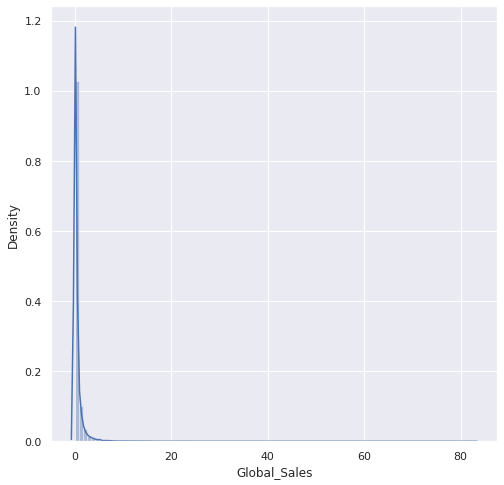

In [ ]:
#To get an idea of the distribution of the data, we can plot the global sales of each observation. 
sns.distplot(data.Global_Sales, bins=100)

As the plot shows, almost all of the data has very few Global Sales. As we want to investigate the popularity of games, we will only look at the top 1000 games. 

In [ ]:
#Filtering - remember that we don't want to include Wii Sports at index 0 as well. 
data = data[1:1001]

In [ ]:
#Now let's look at the info of the data now. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          1000 non-null   int64  
 1   Name          1000 non-null   object 
 2   Platform      1000 non-null   object 
 3   Year          990 non-null    float64
 4   Genre         1000 non-null   object 
 5   Publisher     999 non-null    object 
 6   NA_Sales      1000 non-null   float64
 7   EU_Sales      1000 non-null   float64
 8   JP_Sales      1000 non-null   float64
 9   Other_Sales   1000 non-null   float64
 10  Global_Sales  1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [ ]:
#We can see that there are 10 observations that has no year. We drop those values. 
data = data.dropna()

In [ ]:
data.shape

(990, 11)

In [ ]:
#We change the index to be the Rank of the games. 
data.set_index('Rank', inplace=True)

In [ ]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [ ]:
#Lets look at the Platform column.
data.Platform.value_counts()

PS2     162
X360    130
PS3     120
PS       82
Wii      73
DS       67
PS4      45
NES      34
PC       34
GB       32
N64      29
3DS      29
GBA      28
SNES     26
PSP      21
XOne     21
GC       15
XB       14
WiiU     10
2600      7
GEN       7
DC        2
PSV       1
SAT       1
Name: Platform, dtype: int64

As we can see there are alot of different platforms the games has been distributed to. It could be where  Therefore we have created the other dataset called cc, which categorizes the platforms into 5 categories:
* Playstation
* Nintendo
* Xbox
* PC
* Other

In [ ]:
#Lets merge the PlatformCategory onto the dataset
data = pd.merge(data,cc,how='left',on='Platform')

In [ ]:
#We should see that the Console category has been added to the dataset.
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,ConsoleCategory
0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
3,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
4,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Nintendo


Now lets start to get some insights into the dataset. First, lets see the distribution of the Platform, as well as the Genre. 

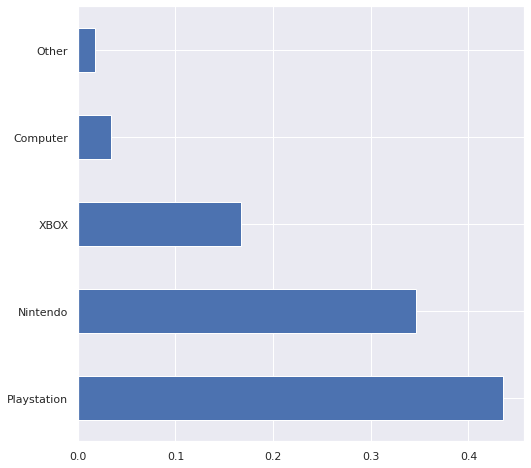

In [ ]:
data.ConsoleCategory.value_counts(normalize=True).plot(kind='barh')

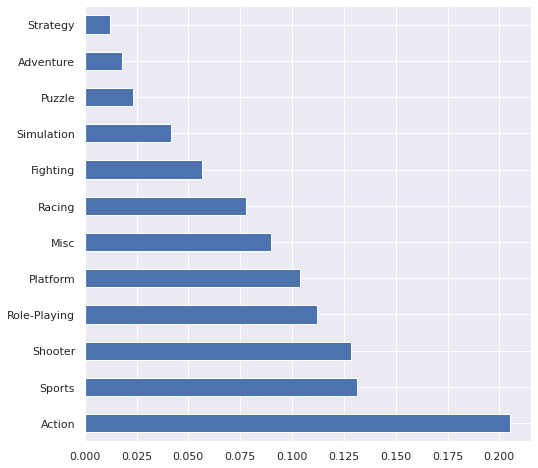

In [ ]:
data.Genre.value_counts(normalize=True).plot(kind='barh')

So in the top 1000, most games are distributed to the Playstation, and most often the Genre is Action. Theoretically we should see that Action games make up most of the games for Playstation. 

In [ ]:
#We're doing a crosstab to figure out how big a percentage of the games are split 
pd.crosstab(data.Genre, data.ConsoleCategory, normalize='columns', margins=True)

ConsoleCategory,Computer,Nintendo,Other,Playstation,XBOX,All
Genre,,,,,,
Action,0.058824,0.137026,0.176471,0.264501,0.224242,0.205051
Adventure,0.058824,0.020408,0.000000,0.016241,0.012121,0.018182
Fighting,0.000000,0.037901,0.117647,0.083527,0.030303,0.056566
Misc,0.088235,0.157434,0.000000,0.048724,0.066667,0.089899
Platform,0.000000,0.195335,0.352941,0.069606,0.000000,0.104040
Puzzle,0.000000,0.058309,0.058824,0.004640,0.000000,0.023232
Racing,0.000000,0.046647,0.058824,0.109049,0.078788,0.077778
Role-Playing,0.205882,0.157434,0.000000,0.078886,0.096970,0.112121
Shooter,0.147059,0.026239,0.176471,0.136891,0.309091,0.128283


We see from this that 26% of all Playstation games are Action games, while the next highest percentage is sports games at 16%. So by a fair margin, most of the Playstation games are Action games as well. We can also reverse this and normalize it by columns, to see how many of the action games are distributed to Playstation. 


In [ ]:
pd.crosstab(data.ConsoleCategory,data.Genre, normalize='columns', margins=True)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
ConsoleCategory,,,,,,,,,,,,,
Computer,0.009852,0.111111,0.000000,0.033708,0.000000,0.000000,0.000000,0.063063,0.039370,0.219512,0.000000,0.500000,0.034343
Nintendo,0.231527,0.388889,0.232143,0.606742,0.650485,0.869565,0.207792,0.486486,0.070866,0.536585,0.230769,0.333333,0.346465
Other,0.014778,0.000000,0.035714,0.000000,0.058252,0.043478,0.012987,0.000000,0.023622,0.000000,0.007692,0.000000,0.017172
Playstation,0.561576,0.388889,0.642857,0.235955,0.291262,0.086957,0.610390,0.306306,0.464567,0.219512,0.546154,0.083333,0.435354
XBOX,0.182266,0.111111,0.089286,0.123596,0.000000,0.000000,0.168831,0.144144,0.401575,0.024390,0.215385,0.083333,0.166667


We can see that 56% of all action games published, are published to Playstation. Now lets have a look how the different Platforms performs across the different sales regions. 

In [ ]:
#Grouping the columns by their platform to each Sales column. 
data.groupby(data['ConsoleCategory'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
ConsoleCategory,,,,,
Nintendo,825.78,438.77,404.36,101.95,1770.76
Playstation,687.78,546.27,134.74,225.52,1594.18
XBOX,409.51,183.78,5.05,54.81,653.26
Computer,54.29,47.17,0.17,6.22,107.84
Other,41.96,7.29,2.64,1.19,53.11


We have now gained the minor insight to let us know that Nintendo has sold the most copies globally, but is mainly a market leader in Japan and NA, where as Playstation is the leader in EU and Other. The distinction could be made that as most 3rd world countries are placed in the Other category, having a bigger marketshare here, would be more beneficial, when the 3rd world countries starts to develop more and more.

In [ ]:
data.groupby(data['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,373.89,255.15,55.20,93.71,777.95
Shooter,347.23,179.94,14.09,60.75,602.01
Platform,285.24,127.19,92.10,30.58,535.11
Role-Playing,191.42,117.70,173.57,32.08,514.80
Sports,211.66,156.40,46.22,58.83,473.10
Misc,181.29,110.31,42.65,33.54,367.70
Racing,158.31,115.97,37.23,40.28,351.72
Fighting,94.83,43.44,29.20,15.28,182.79
Simulation,65.54,58.97,22.57,12.29,159.39


Unsurprinsingly, Action games has also sold the highest amount of copies. Worth noting is though, that Action games seem to be doing a lot worse in Japan than in any other region, while Role-Playing is similar a lot more popular in the Region. I'm not going to make any conclussions about that - keep your prejudice for yourself :-)

The last thing we could be interested in is seeing how the sales has evolved over the years. In this instance we have choosen to split up the sales columns by the Regions in one plot, and the Global Sales in its own plot. This has been done, because the Global Sales line could be mistaken for a region in itself, when it is in theory a total-column. 

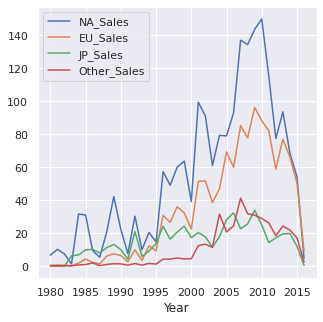

In [ ]:
data.groupby(data['Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().plot(figsize=(5,5))

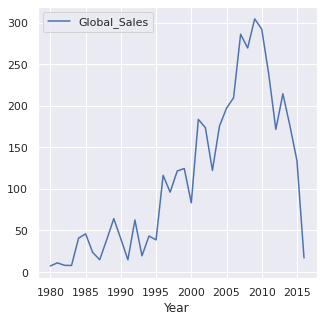

In [ ]:
data.groupby(data['Year'])[['Global_Sales']].sum().plot(figsize=(5,5))

We can conclude that sales has been plummetting for every region in the recent years. This could look like the sales has been doing worse, but there could be several other explanations. It could be that the recent games haven't had the time to be distributed and therefore aren't at the previous years level yet. It could also be how the data is measured - like if downloads counted, or if it is only physical copies of a game.

Knowledge about the market would tell you that the profit is not to be found in game-sales anymore, but within "In-Game Purchases" instead. This could mean that distributors doesn't care that much about their sales-numbers, as long as their profit is the same as always.

#Unsupervised Machine Learning

First off, we want to search for patterns in the data, that we haven't already seen. To do this, we will use unsupervised machine learning to regocnize any patterns in the data. 

In [ ]:
# To do any kind of unsupervised machine leaning we only want the numerical values, so we take every column from NA_sales to Global_sales, both included.
games_numeric = data.loc[:,"NA_Sales":"Global_Sales"]

In [ ]:
# Now we've only got 5 columns.
games_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      990 non-null    float64
 1   EU_Sales      990 non-null    float64
 2   JP_Sales      990 non-null    float64
 3   Other_Sales   990 non-null    float64
 4   Global_Sales  990 non-null    float64
dtypes: float64(5)
memory usage: 46.4 KB


In [ ]:
# Checking the mean of the 5 collumns. This is used as a reference to show how StandardScaler transform these later.
games_numeric.mean()

NA_Sales        2.039717
EU_Sales        1.235636
JP_Sales        0.552485
Other_Sales     0.393626
Global_Sales    4.221364
dtype: float64

In [ ]:
# Same as before but with the variance
games_numeric.var()

NA_Sales         5.334645
EU_Sales         1.875929
JP_Sales         1.075477
Other_Sales      0.352529
Global_Sales    17.166730
dtype: float64

We need to import the StandardScaler. This needs to be done because the numeric values that are used in the Machine Learning doesn't operate within the same scale. Therefore StandardScaler recalculates the values of each variable, for easier calculations and comparisons. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Using the StandardScaler to transform the numeric numbers. After the transformation every column has a mean of 0 and a variance of 1.
# All the values are changed but they are still the same relative to eachother, so we have the same information just in a different scale.
games_scaled = scaler.fit_transform(games_numeric)

In [ ]:
# Got a very small number so we used round to show that it's effectivly 0
round(games_scaled.mean())

0.0

In [ ]:
# The varaiance is 1 after the StandardScaler
games_scaled.var()

1.0

In [ ]:
# Different way of showing the mean and variance.
pd.DataFrame(games_scaled).describe()

,0,1,2,3,4
count,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02
mean,-4.239033e-17,-2.723971e-16,7.403730e-16,7.233271e-18,8.164064e-17
std,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00
min,-8.835612e-01,-9.026137e-01,-5.330149e-01,-6.632943e-01,-5.943625e-01
25%,-4.666271e-01,-5.446761e-01,-5.233673e-01,-4.442331e-01,-4.953570e-01
50%,-2.381255e-01,-2.378725e-01,-4.558342e-01,-2.588735e-01,-3.214936e-01
75%,8.242639e-02,1.711991e-01,1.302571e-01,7.814376e-02,4.072179e-02
max,1.171326e+01,8.506032e+00,9.326825e+00,1.714807e+01,8.697670e+00


In [ ]:
from sklearn.decomposition import PCA

To get better results from machine learning we use dimensional reduction. This mean that we transform all the numerical data into diffent variables. These variables is a combination of different data and are made by finding patterns in the data. Here we will use two of the most common unsupervised machine learning algorithms, to reduce the data and compare results. 

In [ ]:
# We decided to reduce the data to 2 variables since the explained variance ratio got much lower after that point.
pca = PCA(n_components=2)

In [ ]:
# Making the 2 new variabels based on the scaled dataset.
games_reduced = pca.fit_transform(games_scaled)

In [ ]:
# We now got 990 rows as before but only 2 columns now. This is because PCA has transformed our 5 columns into 2. 
games_reduced.shape

(990, 2)

In [ ]:
# 81,7 % of the variance in the dataset is explained in the 2 new variables. We could include more variables but the result would be diminishing for every variable.
pca.explained_variance_ratio_.cumsum()

array([0.63848486, 0.81724493])

In [ ]:
# To see if we could figure out which data the 2 variables contained we decided to print the 10 highest and lowers scores of each.
test = pd.DataFrame(games_reduced)
top10_1 = test[0].sort_values(ascending=False).index[2:12]
bottom10_1 = test[0].sort_values(ascending=True).index[0:10]
top10_2 = test[1].sort_values(ascending=False).index[2:12]
bottom10_2 = test[1].sort_values(ascending=True).index[2:12]

In [ ]:
# The first variable is heavily correlated with global sales. These are the 10 games with highest value and they are all some of the best selling games. We might even be able to say that it has to do with the popular games in Japan. 
data.Name[top10_1]

2                 Wii Sports Resort
3          Pokemon Red/Pokemon Blue
5             New Super Mario Bros.
6                          Wii Play
7         New Super Mario Bros. Wii
16    Grand Theft Auto: San Andreas
9                        Nintendogs
4                            Tetris
15               Grand Theft Auto V
10                    Mario Kart DS
Name: Name, dtype: object

In [ ]:
# These are some of the worst selling games of the dataset. Remember that this is still the top 1000ish games, so there is still 15k games worse selling than these.
data.Name[bottom10_1]

943                                   The Sims: Hot Date
942                                         Namco Museum
867                        Who wants to be a millionaire
953                                        Madden NFL 07
971                                        Madden NFL 25
913                                        Madden NFL 06
987    2 Games in 1 Double Pack: The Incredibles / Fi...
977                                         WWF Attitude
983                             Tom Clancy's Ghost Recon
853                          E.T.: The Extra Terrestrial
Name: Name, dtype: object

In [ ]:
# The second variable is not as obvious as the first. Our best guess is that it has something to do with the ratio of sales between different regions.
# Many of these got big sales in NA and EU but almost none elsewhere. Others are big in Japan but not anywhere else (relativly to the market size)
data.Name[top10_2]

15             Grand Theft Auto V
33     Call of Duty: Black Ops II
346     Pro Evolution Soccer 2008
32      Call of Duty: Black Ops 3
436                FIFA Soccer 08
81                 FIFA Soccer 13
43             Grand Theft Auto V
9                      Nintendogs
111                       FIFA 14
53                 Gran Turismo 5
Name: Name, dtype: object

In [ ]:
#The same thing goes for the bottom10 in the second variable. Nothing completely obvious, but could tell something about this being popular games in Japan, and not popular in NA/EU. 
data.Name[bottom10_2]

11                        Pokemon Gold/Pokemon Silver
212                          Monster Hunter Freedom 3
24                      Pokemon Ruby/Pokemon Sapphire
4                                              Tetris
25                        Pokemon Black/Pokemon White
148    Dragon Quest IX: Sentinels of the Starry Skies
240                Dragon Quest VII: Warriors of Eden
19                      Pokemon Diamond/Pokemon Pearl
20                                   Super Mario Land
310                                Dragon Warrior III
Name: Name, dtype: object

Now we move onto plotting the different variables compared to each other. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


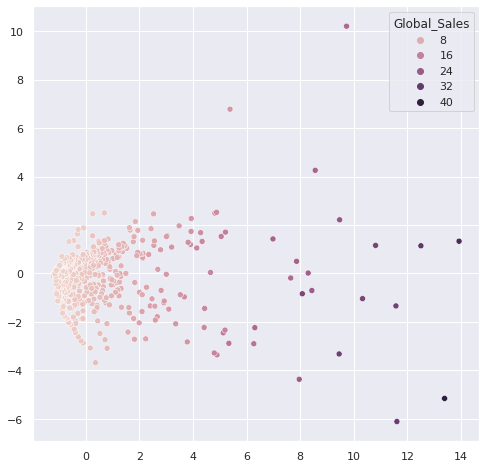

In [ ]:
# Plotting the 2 variables with global sales as hue.
sns.scatterplot(games_reduced[:,0], games_reduced[:,1],hue=data.Global_Sales)

As we can see, we sort of get a result that makes sense. It is easy to see that the more to the right on the x-axis the better the game has sold. On the y-axis, it can be a bit more difficult to enterpret exactly what the trigger is. From the previous top10 and bottom10 we could expect it to be related to what region a game has sold the most in.

In [ ]:
import umap

In [ ]:
# We also try dimensional reduction with umap, just to see if it makes any difference
reducer = umap.UMAP(n_components=2)

In [ ]:
# We fit it to the scaled data just as before. And we confirm that we only got 2 columns by printing the shape
games_umap = reducer.fit_transform(games_scaled)
games_umap.shape

(990, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


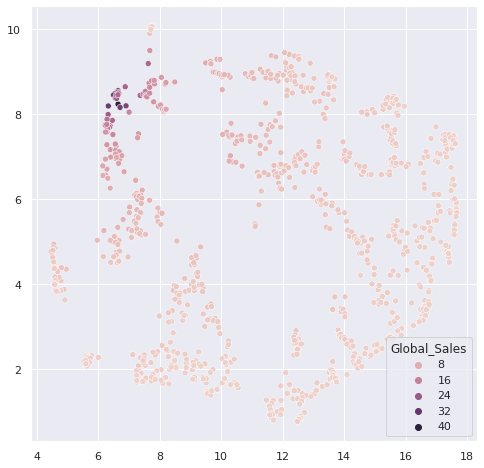

In [ ]:
# Umap does a better job at clustering the data or at least at visualizing the data.
sns.scatterplot(games_umap[:,0], games_umap[:,1],hue=data.Global_Sales)

Again we see that with umaps dimensions, we are able to see the best sellers in the topleft corner. We try to plot UMAP with the ConsoleCategories aswell to see if there are a bit more explanation found there. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


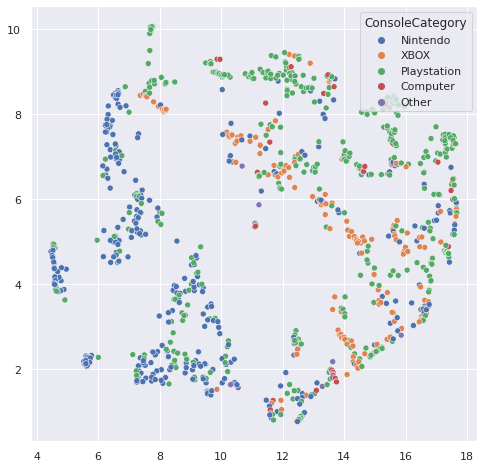

In [ ]:
sns.scatterplot(games_umap[:,0], games_umap[:,1],hue=data.ConsoleCategory)

Interestingly umap does, to some degree, map the games based on their platform. This is especially interesting because UMAP hasn't been fed any information about the datas platform. 

Now we import KMeans to create clusters for the data. The cluster can be used to show a way to devide the data into 3 categories.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# We make 3 clusters to see if we can find any patterns in the different clusters
clusters = KMeans(n_clusters=3)
clusters.fit(games_umap)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


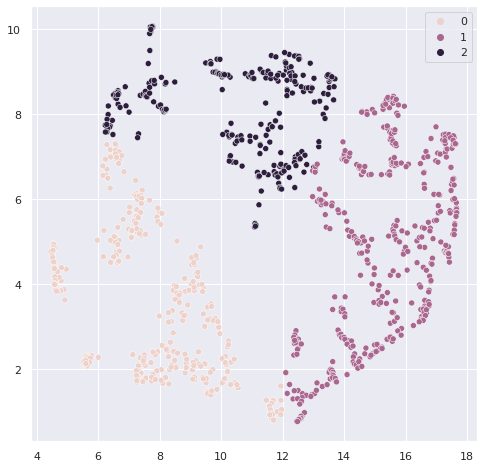

In [ ]:
# All the best selling games seems to be in the same cluster. There isn't anything about the 
sns.scatterplot(games_umap[:,0], games_umap[:,1],hue=clusters.labels_)

In [ ]:
# We can now use the KMeans clustering to compare to the Genre, to see if there is any correlation between those. Genre doesn't really show us anything of use.
pd.crosstab(clusters.labels_,data.Genre, normalize="columns")

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
row_0,,,,,,,,,,,,
0,0.236453,0.444444,0.410714,0.303371,0.553398,0.608696,0.259740,0.621622,0.047244,0.390244,0.200000,0.25
1,0.497537,0.388889,0.535714,0.438202,0.262136,0.260870,0.480519,0.171171,0.551181,0.414634,0.430769,0.50
2,0.266010,0.166667,0.053571,0.258427,0.184466,0.130435,0.259740,0.207207,0.401575,0.195122,0.369231,0.25


In [ ]:
# When we use the Consoles Category as a measure, we can see a bit more information, like Nintendo would most likely be placed in variable 2. 
pd.crosstab(clusters.labels_,data.ConsoleCategory)


ConsoleCategory,Computer,Nintendo,Other,Playstation,XBOX
row_0,,,,,
0,6,219,4,84,4
1,18,66,8,214,109
2,10,58,5,133,52


#Supervised machine learning


In [ ]:
#We import the LabelEncoder, to be able to give a label to the testing data when predicting.
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = games_numeric

In [ ]:
#We encode a categorical variable. 

y = data.ConsoleCategory
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [ ]:
#Now we split our data into to components; the training set and the test set. We want 20% to be test size, and the remaining 80% to be our training size.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
#When we have split the data into each test size, we use a Linear Regression model to fit the training set.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Now lets see the R^2 score to determine how good our model is. 
model.score(X_test,y_test)

0.6464646464646465

In this instance, the score of .64 tells us about the correlation between the predicted labels and the true labels. Although it is not entirely true, there is some truth to saying that the model correctly predicts the label for the video game 64% of the times. Impressive? No.

In [ ]:
#We can now obtain the labels from both of the testing sets, to see if the model managed to correctly set the labels
true_console = labelencoder_y.inverse_transform(y_test)

predicted_console = labelencoder_y.inverse_transform(model.predict(X_test))

In [ ]:
#We simply create a dataframe, with the true labels and the predicted labels, and then crosstab it.
df = pd.DataFrame({'true_console': true_console, 'predicted_console': predicted_console}) 

pd.crosstab(df.true_console, df.predicted_console)

predicted_console,Computer,Nintendo,Playstation,XBOX
true_console,,,,
Computer,1,0,4,3
Nintendo,0,39,15,5
Other,0,0,1,1
Playstation,0,11,74,7
XBOX,0,0,23,14


From the crosstab we can see that the model hasn't predicted any games as in the "other" category. We also see that the model has been pretty good at predicting when a game was a Nintendo game, but struggled a bit more with predicting Xbox vs Playstation games. To get more precise than the crosstab we can use classification_reports.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Precision = TP/(TP+FP)
# Recall = TP/P
# The f1-score is the weighted average of precision and recall
# support is the amount of true observations in the test set

print(classification_report(true_console,predicted_console, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

    Computer       1.00      0.12      0.22         8
    Nintendo       0.78      0.66      0.72        59
       Other       0.00      0.00      0.00         2
 Playstation       0.63      0.80      0.71        92
        XBOX       0.47      0.38      0.42        37

    accuracy                           0.65       198
   macro avg       0.58      0.39      0.41       198
weighted avg       0.65      0.65      0.63       198



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model does predict right most of the times, but it's definitely not perfect. Nintento gets a precision of 0.74 which means that 74% of the Nintendo guesses are true positives and the remaning 26% are false positives. 
Nintendo gets a recall of 0.66 which means that 66% of Nintendo games are predicted right and the remaining are predicted as another console
The F1-score is just an average of the vales above.


Now we import the relevant packages for the XGBoost algorithm aswell. We want to try to do the machine learning on several different algorithms to see if we could potentially enhance the R^2 result. In this instance we youse the XGBoost to do so. We do a lot of the same things as with linear regression, but with slighty different parameters. 

In [ ]:
#Here we import the XGboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Again we can test the score of the model, to see how well the new model fits.
model_xgb.score(X_test,y_test)

0.696969696969697

In [ ]:
# Just as a reminder
# Precision = TP/(TP+FP)
# Recall = TP/P
# The f1-score is the weighted average of precision and recall
# support is the amount of true observations in the test set
predicted_console_xgb = labelencoder_y.inverse_transform(model_xgb.predict(X_test))

print(classification_report(true_console,predicted_console_xgb, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

    Computer       0.50      0.38      0.43         8
    Nintendo       0.65      0.75      0.69        59
       Other       0.00      0.00      0.00         2
 Playstation       0.74      0.75      0.75        92
        XBOX       0.73      0.59      0.66        37

    accuracy                           0.70       198
   macro avg       0.52      0.49      0.50       198
weighted avg       0.69      0.70      0.69       198



XGBoost does a better job at predicting the consoles. The F1 score of Nintendo falls to 0.69, but the rest of the consoles are predicted more accurately. Especially Xbox is much better and went from a F1-score of 0.34 with LinearRegression to 0.66 with XGBoost.


In [ ]:
#Here we again create the crosstab to see how well the prediction has turned out with XGboost
df_xgb = pd.DataFrame({'true_console': true_console, 'predicted_console_xgb': predicted_console_xgb}) 

pd.crosstab(df_xgb.true_console, df_xgb.predicted_console_xgb)

predicted_console_xgb,Computer,Nintendo,Other,Playstation,XBOX
true_console,,,,,
Computer,3,0,0,5,0
Nintendo,1,44,0,10,4
Other,0,1,0,1,0
Playstation,1,18,0,69,4
XBOX,1,5,1,8,22


The major difference with this crosstab and the linear regression one, is the ability to seperate Playstation and Xbox from each other. While one game has been predicted as the "other" platform, the model makes a mistake as it was really an XBOX game. 

In [ ]:
#These are the parameteres that the XGBoost uses to make the model for the GridSearch.
parameters_xgb = {"max_depth": [1,6],
"learning_rate": [0.3,0.5],
'min_child_weight': [0.5,1],
"alpha": [0,0.5],
"gamma": [0,1],
'n_estimators': [100,200,300]}

In [ ]:
scorer = make_scorer(mean_squared_error)
grid_obj = GridSearchCV(model_xgb, parameters_xgb, scoring=scorer)

In [ ]:
#With the 6 parameters, which all have 2 or 3 variables to be testet for, a total of 96 combinations will be testet.
#This takes 3 minutes to run right now - if we add just one more variable, it takes between 45 and 60 minutes.
grid_fit = grid_obj.fit(X,y)

In [ ]:
#We take the best estimator from the GridSearchCV and set is as best_reg
best_reg = grid_fit.best_estimator_
best_reg.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Now we test the R^2 score of the best_reg aswell.
best_reg.score(X_test,y_test)

0.7323232323232324

Random Forest Regressor is a third/fourth way for us to try to predict the label of the game. As everything used here has already been described, we will not do that in this case.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model_rf.score(X_test,y_test)

0.3903593936112615

With a score that much lower than the score for both the Linear Regression and the XGBoost, there is no reason to dive deeper into the Random Forest.

In [ ]:
!jupyter nbconvert --to html "Video_Game_Sales.ipynb"

[NbConvertApp] Converting notebook Video_Game_Sales.ipynb to html
[NbConvertApp] Writing 887874 bytes to Video_Game_Sales.html
